In [1]:
#versão da Linguagem Python
from platform import python_version
print('Versão da linguagem Python usada no ambiente virtual desse projeto:', python_version())

Versão da linguagem Python usada no ambiente virtual desse projeto: 3.12.7


In [2]:
# --- 1. CONFIGURAÇÃO DO AMBIENTE ---

# Importação de bibliotecas padrão
import pandas as pd
import numpy as np
import os
import sys
from statsmodels.tsa.api import SARIMAX
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# Configurações de visualização para os gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (18, 7)
plt.rcParams['font.size'] = 12

In [3]:
# --- 2. CARGA E LIMPEZA DOS DADOS ---

# 2.1. Definição de Caminhos
base_dir = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
data_raw_path = os.path.join(base_dir, "data", "raw")
NOMES_ARQUIVOS = [
    "dados_serie_temporal_2014-01-01_a_2016-01-01.csv",
    "dados_serie_temporal_2016-01-01_a_2018-01-01.csv",
    "dados_serie_temporal_2018-01-01_a_2019-01-01.csv",
    "dados_serie_temporal_2019-01-01_a_2020-01-01.csv",
    "dados_serie_temporal_2020-01-01_a_2022-01-01.csv",
    "dados_serie_temporal_2022-01-01_a_2024-01-01.csv",
    "dsc.csv"
]

# 2.2. Leitura, Correção e Consolidação
lista_dataframes = []
for nome_arquivo in NOMES_ARQUIVOS:
    caminho_completo = os.path.join(data_raw_path, nome_arquivo)
    if os.path.exists(caminho_completo):
        df_temp = pd.read_csv(caminho_completo, sep=',', on_bad_lines='skip', engine='python', encoding='latin1', index_col=False)
        lista_dataframes.append(df_temp)
df_raw = pd.concat(lista_dataframes, ignore_index=True)

# 2.3. Limpeza
df_unico = df_raw.drop_duplicates(subset=['NUMERO'], keep='first').copy()
df_unico.loc[:, 'DATA_RECEBIMENTO'] = pd.to_datetime(df_unico['DATA_RECEBIMENTO'], errors='coerce')
df_unico.dropna(subset=['DATA_RECEBIMENTO'], inplace=True)
df_unico.sort_values(by='DATA_RECEBIMENTO', inplace=True)

print("✅ Carga e limpeza concluídas.")
print(f"Total de registros únicos e válidos: {len(df_unico)}")

# 2.4. Salvando o DataFrame consolidado e limpo
data_processed_path = os.path.join(base_dir, "data", "processed")
os.makedirs(data_processed_path, exist_ok=True) 

output_csv_path = os.path.join(data_processed_path, "dsc.csv")
df_unico.to_csv(output_csv_path, index=False, encoding='latin1')

print(f"📁 Arquivo salvo com sucesso em: {output_csv_path}")

C:\Users\mlzengo\AppData\Local\Temp\ipykernel_12772\1527771649.py:21: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_temp = pd.read_csv(caminho_completo, sep=',', on_bad_lines='skip', engine='python', encoding='latin1', index_col=False)
C:\Users\mlzengo\AppData\Local\Temp\ipykernel_12772\1527771649.py:21: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_temp = pd.read_csv(caminho_completo, sep=',', on_bad_lines='skip', engine='python', encoding='latin1', index_col=False)
C:\Users\mlzengo\AppData\Local\Temp\ipykernel_12772\1527771649.py:21: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_temp = pd.read_csv(caminho_completo, sep=',', on_bad_lines='skip', engine='python', encoding='latin1', index_col=False)
C:\Users\mlzengo\AppData\Local\Temp\ipykernel_

✅ Carga e limpeza concluídas.
Total de registros únicos e válidos: 5678838


KeyboardInterrupt: 

In [ ]:
df1 = pd.read_csv(r"C:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\data\processed\dsc.csv",sep=',', engine='python', encoding='latin1', index_col=False)
df1.head()
df1.shape

(5678838, 11)

In [ ]:
df1.columns

Index(['NUMERO', 'DATA_RECEBIMENTO', 'PRIORIDADE', 'SEGREDO_JUSTICA',
       'SERVENTIA', 'COMARCA', 'CLASSE', 'ASSUNTOS', 'PROC_STATUS',
       'AREA_ACAO', 'VALOR_CAUSA'],
      dtype='object')

In [ ]:
data = pd.read_csv(r"C:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\data\raw\serie_temporal_assunto.csv",sep=',')
data.head()
data.shape

(6644, 3)

In [ ]:
data.columns

Index(['ID_CNJ_ASSUNTO', 'CNJ_ASSUNTO', 'PROJUDI_ASSUNTO'], dtype='object')

In [ ]:
data = data.rename(columns={'ID_CNJ_ASSUNTO': 'ASSUNTOS'})


In [ ]:
print(data.columns)


Index(['ASSUNTOS', 'CNJ_ASSUNTO', 'PROJUDI_ASSUNTO'], dtype='object')


In [ ]:
import pandas as pd

# Supondo que 'df1' e 'data' já existem
# df1: DataFrame com 'NUMERO' e 'ASSUNTOS' (string com vírgulas)
# data: DataFrame de mapeamento com 'ASSUNTOS' e outras informações

# ==============================================================================
# 1️⃣ EXPLODIR CÓDIGOS (Mantido, pois está correto e eficiente)
# ==============================================================================
print("1️⃣  Explodindo a coluna 'ASSUNTOS'...")
df1_exploded = df1.copy()

# Converte NaNs para string vazia para evitar erros no .str.split
df1_exploded["ASSUNTOS"] = df1_exploded["ASSUNTOS"].fillna('').str.split(",")
df1_exploded = df1_exploded.explode("ASSUNTOS")
df1_exploded["ASSUNTOS"] = df1_exploded["ASSUNTOS"].str.strip()

# Remove linhas que ficaram com 'ASSUNTOS' vazio após o split
df1_exploded = df1_exploded[df1_exploded["ASSUNTOS"] != '']

# Garantir o mesmo tipo de dado para a chave do merge (ótima prática!)
df1_exploded["ASSUNTOS"] = df1_exploded["ASSUNTOS"].astype(str)
data["ASSUNTOS"] = data["ASSUNTOS"].astype(str)


# ==============================================================================
# 2️⃣ MERGE (Mantido, pois está correto)
# ==============================================================================
print("2️⃣  Realizando o merge dos DataFrames...")
df_merged = df1_exploded.merge(
    data,
    on="ASSUNTOS",
    how="left",
    indicator=True  # 'indicator' é excelente para depuração
)

# Verificar o resultado do mapeamento
print("Distribuição do merge:")
print(df_merged["_merge"].value_counts())


# ==============================================================================
# 3️⃣ AGRUPAR POR NUMERO (Principal melhoria)
# ==============================================================================
print("\n3️⃣  Agrupando os resultados por 'NUMERO'...")

# --- A Estratégia Otimizada ---

# 3.1. Definir a estratégia de agregação para cada tipo de coluna
# Colunas que são estáveis por 'NUMERO' e devem ter um valor único.
# Usamos 'first' por ser rápido e eficiente.
colunas_estaveis = [c for c in df1.columns if c not in ['NUMERO', 'ASSUNTOS']]

# Colunas que vieram do merge ('data') e podem ter múltiplos valores por 'NUMERO'.
colunas_agregadas = [c for c in data.columns if c not in ['ASSUNTOS']]

# 3.2. Construir o dicionário de agregação de forma explícita
agg_dict = {
    # Para os códigos de 'ASSUNTOS', reconstruímos a string única
    "ASSUNTOS": lambda x: ",".join(sorted(x.unique())),
    
    # Para as colunas estáveis, pegamos o primeiro valor (é o mesmo para todo o grupo)
    **{col: 'first' for col in colunas_estaveis},
    
    # Para as colunas que podem variar, juntamos os valores únicos em uma lista
    # (ou em uma string, que geralmente é mais prático)
    **{col: lambda x: sorted(list(x.dropna().unique())) for col in colunas_agregadas}
}


# 3.3. Aplicar a agregação
df_final = df_merged.groupby("NUMERO").agg(agg_dict).reset_index()


# (Opcional) Se preferir juntar em uma string em vez de uma lista (mais fácil de manusear):
# agg_dict_string = {
#     "ASSUNTOS": lambda x: ",".join(sorted(x.unique())),
#     **{col: 'first' for col in colunas_estaveis},
#     **{col: lambda x: " | ".join(sorted(list(x.dropna().unique()))) for col in colunas_agregadas}
# }
# df_final_string = df_merged.groupby("NUMERO").agg(agg_dict_string).reset_index()


# ==============================================================================
# 4️⃣ VISUALIZAR RESULTADO
# ==============================================================================
print("\n✅ Processo concluído. Visualizando as primeiras linhas do resultado:")
print(df_final.head())
print("\nVerificando os tipos de dados das colunas:")
df_final.info()

1️⃣  Explodindo a coluna 'ASSUNTOS'...
2️⃣  Realizando o merge dos DataFrames...
Distribuição do merge:
_merge
both          21806758
left_only            0
right_only           0
Name: count, dtype: int64

3️⃣  Agrupando os resultados por 'NUMERO'...

✅ Processo concluído. Visualizando as primeiras linhas do resultado:
                      NUMERO ASSUNTOS     DATA_RECEBIMENTO PRIORIDADE  \
0  -245875-70.2020.8.09.0000     9160  2020-09-06 00:00:00     Normal   
1  -245876-70.2020.8.09.0000     9160  2020-09-06 00:00:00     Normal   
2  -245877-70.2020.8.09.0000     9160  2020-09-06 00:00:00     Normal   
3  0000000-00.0000.8.09.0139     7942  2014-09-16 00:00:00     Normal   
4  0000000-00.0000.8.09.0156     7942  2014-04-23 00:00:00     Normal   

   SEGREDO_JUSTICA                              SERVENTIA    COMARCA  CLASSE  \
0             True                        2ª Câmara Cível    GOIÂNIA   202.0   
1             True                        2ª Câmara Cível    GOIÂNIA   202.0   

In [ ]:
salvar_csv_path = os.path.join(data_processed_path, "dsc_completo.csv")
df_final.to_csv(salvar_csv_path, index=False, encoding='latin1')

In [ ]:
df = pd.read_csv(r"C:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\data\processed\dsc_completo.csv",sep=',', engine='python', encoding='latin1', index_col=False)
df.columns


Index(['NUMERO', 'ASSUNTOS', 'DATA_RECEBIMENTO', 'PRIORIDADE',
       'SEGREDO_JUSTICA', 'SERVENTIA', 'COMARCA', 'CLASSE', 'PROC_STATUS',
       'AREA_ACAO', 'VALOR_CAUSA', 'CNJ_ASSUNTO', 'PROJUDI_ASSUNTO'],
      dtype='object')

In [ ]:
import ast
# ==============================================================================
# 1. LIMPEZA INICIAL
# ==============================================================================
# Passo 1.1: Limpa o nome de TODAS as colunas de uma vez.
print("Limpando nomes das colunas...")
df.rename(columns=lambda column: column.strip(), inplace=True)
print("Nomes das colunas disponíveis após limpeza:", df.columns.tolist())

# Passo 1.2: Limpa os valores que parecem listas de item único.
print("\nLimpando valores com caracteres indesejados...")
colunas_para_limpar_valores = [
    'DATA_RECEBIMENTO', 'PRIORIDADE', 'SEGREDO_JUSTICA', 'SERVENTIA', 
    'COMARCA', 'CLASSE', 'PROC_STATUS', 'AREA_ACAO', 'VALOR_CAUSA'
]
for col in colunas_para_limpar_valores:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip("[]'")
print("Limpeza de valores concluída. ✅")


# ==============================================================================
# 2. CONVERSÃO DE TIPOS DE DADOS
# ==============================================================================
print("\nIniciando conversão de tipos...")

# --- Coluna de Data ---
if 'DATA_RECEBIMENTO' in df.columns:
    df['DATA_RECEBIMENTO'] = pd.to_datetime(df['DATA_RECEBIMENTO'], errors='coerce')
    print("-> Coluna de data convertida para datetime.")

# --- Outras conversões... ---
# (O restante do código de conversão para float, category, boolean continua igual)
if 'VALOR_CAUSA' in df.columns:
    df['VALOR_CAUSA'] = df['VALOR_CAUSA'].str.replace('R$', '', regex=False).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).str.strip()
    df['VALOR_CAUSA'] = pd.to_numeric(df['VALOR_CAUSA'], errors='coerce')
    print("-> Coluna de valor da causa convertida para float.")

colunas_categoricas = ['PRIORIDADE', 'SERVENTIA', 'COMARCA', 'CLASSE', 'PROC_STATUS', 'AREA_ACAO']
for col in colunas_categoricas:
    if col in df.columns:
        df[col] = df[col].astype('category')
print(f"-> Colunas categóricas convertidas.")

if 'SEGREDO_JUSTICA' in df.columns:
    mapeamento_booleano = {'SIM': True, 'NÃO': False, 'Sim': True, 'Não': False}
    df['SEGREDO_JUSTICA'] = df['SEGREDO_JUSTICA'].map(mapeamento_booleano).astype('boolean')
    print("-> Coluna de segredo de justiça convertida para boolean.")


# --- Conversão de listas (ETAPA LENTA) ---
print("\nIniciando conversão de colunas de listas (este passo pode demorar)...")
colunas_lista = ['ASSUNTOS', 'CNJ_ASSUNTO', 'PROJUDI_ASSUNTO']

def converte_str_para_lista(valor):
    try:
        return ast.literal_eval(str(valor))
    except (ValueError, SyntaxError):
        return []

for col in colunas_lista:
    if col in df.columns:
        df[col] = df[col].apply(converte_str_para_lista)
print(f"-> Colunas de assuntos convertidas para listas. ✅")


# ==============================================================================
# 3. VERIFICAÇÃO FINAL
# ==============================================================================
print("\nTratamento finalizado! Verificando os tipos de dados do DataFrame:")
df.info()

Limpando nomes das colunas...
Nomes das colunas disponíveis após limpeza: ['NUMERO', 'ASSUNTOS', 'DATA_RECEBIMENTO', 'PRIORIDADE', 'SEGREDO_JUSTICA', 'SERVENTIA', 'COMARCA', 'CLASSE', 'PROC_STATUS', 'AREA_ACAO', 'VALOR_CAUSA', 'CNJ_ASSUNTO', 'PROJUDI_ASSUNTO']

Limpando valores com caracteres indesejados...
Limpeza de valores concluída. ✅

Iniciando conversão de tipos...
-> Coluna de data convertida para datetime.
-> Coluna de valor da causa convertida para float.
-> Colunas categóricas convertidas.
-> Coluna de segredo de justiça convertida para boolean.

Iniciando conversão de colunas de listas (este passo pode demorar)...
-> Colunas de assuntos convertidas para listas. ✅

Tratamento finalizado! Verificando os tipos de dados do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5678337 entries, 0 to 5678336
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   NUMERO            object        
 1   ASSUNTOS         

In [ ]:
# 1.1. Verificação inicial do DataFrame
print("Informações Gerais do DataFrame:")
df.info()

# 1.2. Quantidade de dados
print(f"\nO dataset possui {df.shape[0]:,} linhas e {df.shape[1]} colunas.")



Informações Gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5678337 entries, 0 to 5678336
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   NUMERO            object        
 1   ASSUNTOS          object        
 2   DATA_RECEBIMENTO  datetime64[ns]
 3   PRIORIDADE        category      
 4   SEGREDO_JUSTICA   boolean       
 5   SERVENTIA         category      
 6   COMARCA           category      
 7   CLASSE            category      
 8   PROC_STATUS       category      
 9   AREA_ACAO         category      
 10  VALOR_CAUSA       float64       
 11  CNJ_ASSUNTO       object        
 12  PROJUDI_ASSUNTO   object        
dtypes: boolean(1), category(6), datetime64[ns](1), float64(1), object(4)
memory usage: 314.1+ MB

O dataset possui 5,678,337 linhas e 13 colunas.


In [ ]:
# 1.3. Visualização das primeiras linhas
print("📊 5 PRIMEIRAS LINHAS DO DATASET")
print("=" * 50)
display(HTML("<h4 style='color: #2E86AB;'>🔍 Visualização Inicial - Primeiros Registros</h4>"))
display(df.head().style.set_caption("Tabela 1: Primeiras 5 entradas do dataset"))

# 1.4. Visualização das últimas linhas para garantir a integridade
print("\n" + "=" * 60)
print("📊 5 ÚLTIMAS LINHAS DO DATASET")
print("=" * 50)
display(HTML("<h4 style='color: #2E86AB;'>🔍 Verificação de Integridade - Últimos Registros</h4>"))
display(df.tail().style.set_caption("Tabela 2: Últimas 5 entradas do dataset"))

# Informações adicionais sobre o dataset
print("\n" + "=" * 60)
print("📈 METADADOS DO DATASET")
print("=" * 50)

print(f"• Dimensões do dataset: {df.shape[0]} linhas × {df.shape[1]} colunas")
print(f"• Período abrangido: {df['DATA_RECEBIMENTO'].min()} até {df['DATA_RECEBIMENTO'].max()}" 
      if 'DATA_RECEBIMENTO' in df.columns else "• Coluna de data não disponível")

# Visualização rápida dos tipos de dados
print("\n📝 TIPOS DE DADOS POR COLUNA:")
print("-" * 35)
for col, dtype in df.dtypes.items():
    print(f"• {col:<20}: {str(dtype):<15}")

📊 5 PRIMEIRAS LINHAS DO DATASET


,NUMERO,ASSUNTOS,DATA_RECEBIMENTO,PRIORIDADE,SEGREDO_JUSTICA,SERVENTIA,COMARCA,CLASSE,PROC_STATUS,AREA_ACAO,VALOR_CAUSA,CNJ_ASSUNTO,PROJUDI_ASSUNTO
0,-245875-70.2020.8.09.0000,9160,2020-09-06 00:00:00,Normal,,2ª Câmara Cível,GOIÂNIA,202.0,Erro de Migração,Cível,140530.000000,['Levantamento de Valor'],['DIREITO PROCESSUAL CIVIL E DO TRABALHO -> Liquidação / Cumprimento / Execução -> Levantamento de Valor']
1,-245876-70.2020.8.09.0000,9160,2020-09-06 00:00:00,Normal,,2ª Câmara Cível,GOIÂNIA,202.0,Erro de Migração,Cível,140530.000000,['Levantamento de Valor'],['DIREITO PROCESSUAL CIVIL E DO TRABALHO -> Liquidação / Cumprimento / Execução -> Levantamento de Valor']
2,-245877-70.2020.8.09.0000,9160,2020-09-06 00:00:00,Normal,,2ª Câmara Cível,GOIÂNIA,202.0,Erro de Migração,Cível,140530.000000,['Levantamento de Valor'],['DIREITO PROCESSUAL CIVIL E DO TRABALHO -> Liquidação / Cumprimento / Execução -> Levantamento de Valor']
3,0000000-00.0000.8.09.0139,7942,2014-09-16 00:00:00,Normal,,Rubiataba - Execução Penal/EXECPENWEB,RUBIATABA,nan,Arquivado,Criminal,nan,['Execução Penal e de Medidas Alternativas'],['DIREITO PROCESSUAL PENAL -> Execução Penal e de Medidas Alternativas']
4,0000000-00.0000.8.09.0156,7942,2014-04-23 00:00:00,Normal,,Varjão - Execução Penal/EXECPENWEB,VARJÃO,nan,Arquivado,Criminal,nan,['Execução Penal e de Medidas Alternativas'],['DIREITO PROCESSUAL PENAL -> Execução Penal e de Medidas Alternativas']



📊 5 ÚLTIMAS LINHAS DO DATASET


,NUMERO,ASSUNTOS,DATA_RECEBIMENTO,PRIORIDADE,SEGREDO_JUSTICA,SERVENTIA,COMARCA,CLASSE,PROC_STATUS,AREA_ACAO,VALOR_CAUSA,CNJ_ASSUNTO,PROJUDI_ASSUNTO
5678332,9960921-82.2009.8.09.0006,7785,2016-04-29 00:00:00,Normal,,Anápolis - Execução Penal/EXECPENWEB,ANÁPOLIS,386.0,Arquivado,Criminal,nan,['Prestação Pecuniária'],['DIREITO PROCESSUAL PENAL -> Execução Penal e de Medidas Alternativas -> Pena Restritiva de Direitos -> Prestação Pecuniária']
5678333,9960922-16.2009.8.09.0120,7942,2016-11-24 00:00:00,Normal,,Paraúna - Execução Penal/EXECPENWEB,PARAÚNA,nan,Cálculo,Criminal,nan,['Execução Penal e de Medidas Alternativas'],['DIREITO PROCESSUAL PENAL -> Execução Penal e de Medidas Alternativas']
5678334,9960936-10.2009.8.09.0149,7942,2016-04-15 00:00:00,Normal,,Trindade - Execução Penal/EXECPENWEB,TRINDADE,nan,Arquivado,Criminal,nan,['Execução Penal e de Medidas Alternativas'],['DIREITO PROCESSUAL PENAL -> Execução Penal e de Medidas Alternativas']
5678335,9960954-04.2009.8.09.0158,7942,2014-06-25 00:00:00,Normal,,Santo Antônio do Descoberto - Execução Penal/EXECPENWEB,SANTO ANTÔNIO DO DESCOBERTO,nan,Cálculo,Criminal,nan,['Execução Penal e de Medidas Alternativas'],['DIREITO PROCESSUAL PENAL -> Execução Penal e de Medidas Alternativas']
5678336,9968170-70.2017.8.09.0017,3492,2017-11-04 00:00:00,Normal,,Bela Vista de Goiás - Vara Criminal,BELA VISTA DE GOIÁS,283.0,Arquivado,Criminal,nan,['Incêndio'],['DIREITO PENAL -> Crimes contra a Incolumidade Pública -> Incêndio']



📈 METADADOS DO DATASET
• Dimensões do dataset: 5678337 linhas × 13 colunas
• Período abrangido: 2014-01-01 00:00:00 até 2023-12-31 00:00:00

📝 TIPOS DE DADOS POR COLUNA:
-----------------------------------
• NUMERO              : object         
• ASSUNTOS            : object         
• DATA_RECEBIMENTO    : datetime64[ns] 
• PRIORIDADE          : category       
• SEGREDO_JUSTICA     : boolean        
• SERVENTIA           : category       
• COMARCA             : category       
• CLASSE              : category       
• PROC_STATUS         : category       
• AREA_ACAO           : category       
• VALOR_CAUSA         : float64        
• CNJ_ASSUNTO         : object         
• PROJUDI_ASSUNTO     : object         


# Dicionário de Dados

| Campo | Tipo | Descrição | Observações |
|:------|:-----|:----------|:------------|
| **NUMERO** | Identificador único | Identificador único do processo | Chave primária do sistema |
| **DATA_RECEBIMENTO** | Data | Data em que o processo foi protocolado/recebido | **Variável alvo para a série temporal** |
| **PRIORIDADE** | Categórico | Indica se o processo tem prioridade de tramitação | Valores: [Sim, Não] |
| **SEGREDO_JUSTICA** | Booleano | Indica se o processo corre em segredo de justiça | Valores: [True, False] |
| **SERVENTIA** | Categórico | Unidade judiciária responsável (Vara, Cartório) | Alta cardinalidade |
| **COMARCA** | Categórico | Unidade territorial judiciária | Alta cardinalidade |
| **CLASSE** | Numérico (atual) | Código ou nome da classe processual | Atualmente como float, precisa de investigação |
| **ASSUNTOS** | Categórico | Tema(s) legal(is) tratados no processo | Pode conter múltiplos valores |
| **PROC_STATUS** | Categórico | Status atual do processo | Ex: Ativo, Arquivado, etc. |
| **AREA_ACAO** | Categórico | Área do direito | - |
| **VALOR_CAUSA** | Numérico | Valor monetário atribuído à causa | - |
| **CNJ_ASSUNTO** | Categórico | Valor monetário atribuído à causa | - |
| **PROJUDI_ASSUNTO** | Categórico | Valor monetário atribuído à causa | - |

|

🔍 CONTAGEM DE VALORES AUSENTES POR COLUNA
Tabela 1: Valores Ausentes no Dataset
--------------------------------------------------
SEGREDO_JUSTICA      | 5678337.0        | 100.00%
VALOR_CAUSA          | 876141.0         | 15.43%
--------------------------------------------------

🔍 VERIFICAÇÃO DE REGISTROS DUPLICADOS (EXCLUINDO COLUNAS DE LISTAS)
✅ Nenhum registro duplicado encontrado (considerando colunas sem listas)!

🔎 INVESTIGAÇÃO DA COLUNA 'AREA_ACAO'
Número de valores únicos na coluna AREA_ACAO: 2

Distribuição dos valores


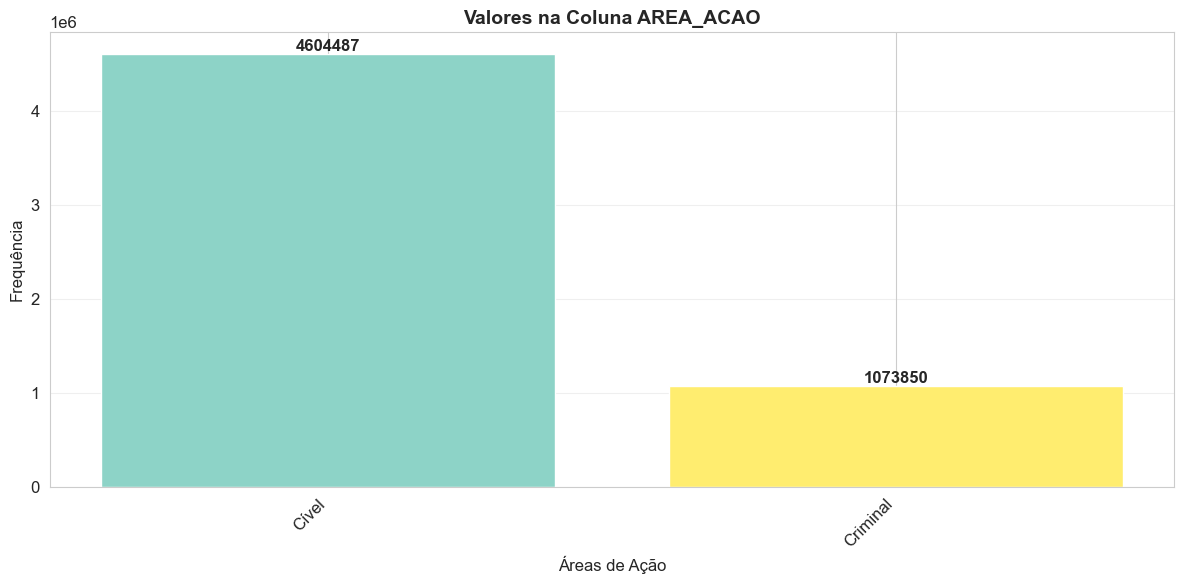

,Área de Ação,Contagem,Percentual (%)
0,Cível,4604487,81.09
1,Criminal,1073850,18.91



💡 Informações adicionais:
   • Tipo de dados: category
   • Valores nulos: 0
   • Valor mais frequente: Cível (4604487 ocorrências)

📅 VERIFICAÇÃO DA COLUNA DATA_RECEBIMENTO
Tipo atual da coluna: datetime64[ns]
Exemplo de valores: [Timestamp('2020-09-06 00:00:00'), Timestamp('2020-09-06 00:00:00'), Timestamp('2020-09-06 00:00:00')]
✅ Nenhum valor nulo na coluna DATA_RECEBIMENTO


In [ ]:
print("🔍 CONTAGEM DE VALORES AUSENTES POR COLUNA")
print("=" * 50)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Criar DataFrame para melhor visualização
missing_df = pd.DataFrame({
    'Valores Ausentes': missing_values, 
    'Percentual (%)': missing_percentage.round(2)
})

# Exibir apenas colunas com valores ausentes
missing_data = missing_df[missing_df['Valores Ausentes'] > 0].sort_values(by='Valores Ausentes', ascending=False)

if not missing_data.empty:
    # Formatar manualmente sem usar .style
    print("Tabela 1: Valores Ausentes no Dataset")
    print("-" * 50)
    
    for idx, row in missing_data.iterrows():
        percent = row['Percentual (%)']
        if percent > 10:
            color_code = "\033[91m"  # Vermelho
        elif percent > 5:
            color_code = "\033[93m"  # Amarelo
        else:
            color_code = "\033[33m"  # Laranja
        
        reset_code = "\033[0m"
        print(f"{idx:<20} | {row['Valores Ausentes']:<16} | {color_code}{percent:.2f}%{reset_code}")
    
    print("-" * 50)
else:
    print("✅ Nenhum valor ausente encontrado no dataset!")

# 2.2. Verificação de registros duplicados
print("\n" + "=" * 60)
colunas_com_listas = ['ASSUNTOS', 'CNJ_ASSUNTO', 'PROJUDI_ASSUNTO']
colunas_para_verificar = [col for col in df.columns if col not in colunas_com_listas]
print("🔍 VERIFICAÇÃO DE REGISTROS DUPLICADOS (EXCLUINDO COLUNAS DE LISTAS)")

num_duplicates = df.duplicated(subset=colunas_para_verificar).sum()
if num_duplicates > 0:
    print(f"⚠️  ALERTA: {num_duplicates:,} linhas duplicadas encontradas (considerando colunas sem listas)!")
else:
    print("✅ Nenhum registro duplicado encontrado (considerando colunas sem listas)!")

# 2.3. Investigação inicial da coluna AREA_ACAO
print("\n" + "=" * 60)
print("🔎 INVESTIGAÇÃO DA COLUNA 'AREA_ACAO'")

if 'AREA_ACAO' in df.columns:
    # Verificar valores únicos
    unique_areas = df['AREA_ACAO'].nunique()
    print(f"Número de valores únicos na coluna AREA_ACAO: {unique_areas}")
    
    # Mostrar distribuição dos valores
    print("\nDistribuição dos valores")
    area_distribution = df['AREA_ACAO'].value_counts().head(10)
    
    # Criar gráfico de barras com cores diferentes para cada área
    plt.figure(figsize=(12, 6))
    
    # Definir uma paleta de cores distintas para cada barra
    colors = plt.cm.Set3(np.linspace(0, 1, len(area_distribution)))
    
    bars = plt.bar(range(len(area_distribution)), area_distribution.values, color=colors)
    plt.title('Valores na Coluna AREA_ACAO', fontsize=14, fontweight='bold')
    plt.xlabel('Áreas de Ação', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    
    # Adicionar os valores nas barras
    for i, (bar, count) in enumerate(zip(bars, area_distribution.values)):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                str(count), ha='center', va='bottom', fontweight='bold')
    
    # Rotacionar labels para melhor visualização
    plt.xticks(range(len(area_distribution)), area_distribution.index, rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', alpha=0.3)
    plt.show()
    
    # Exibir tabela com valores e porcentagens
    display(HTML("<h4 style='color: #2E86AB;'>📊 Distribuição da Área de Ação </h4>"))
    
    area_table = pd.DataFrame({
        'Área de Ação': area_distribution.index,
        'Contagem': area_distribution.values,
        'Percentual (%)': (area_distribution.values / len(df) * 100).round(2)
    })
    
    display(area_table)
    
    # Informações adicionais sobre a coluna
    print(f"\n💡 Informações adicionais:")
    print(f"   • Tipo de dados: {df['AREA_ACAO'].dtype}")
    print(f"   • Valores nulos: {df['AREA_ACAO'].isnull().sum()}")
    print(f"   • Valor mais frequente: {area_distribution.index[0]} ({area_distribution.values[0]} ocorrências)")
    
else:
    print("❌ Coluna 'AREA_ACAO' não encontrada no DataFrame")

# Verificar tipo da coluna DATA_RECEBIMENTO
print("\n" + "=" * 60)
print("📅 VERIFICAÇÃO DA COLUNA DATA_RECEBIMENTO")
if 'DATA_RECEBIMENTO' in df.columns:
    print(f"Tipo atual da coluna: {df['DATA_RECEBIMENTO'].dtype}")
    print(f"Exemplo de valores: {df['DATA_RECEBIMENTO'].head(3).tolist()}")
    
    # Verificar se há valores nulos nesta coluna específica
    null_count = df['DATA_RECEBIMENTO'].isnull().sum()
    if null_count > 0:
        print(f"⚠️  ALERTA: {null_count} valores nulos encontrados na coluna DATA_RECEBIMENTO")
    else:
        print("✅ Nenhum valor nulo na coluna DATA_RECEBIMENTO")
        
else:
    print("Coluna 'DATA_RECEBIMENTO' não encontrada")

🚀 INICIANDO ANÁLISE DE SEGMENTOS

🎯 ============================================================
📈 ANÁLISE DA COLUNA: 'COMARCA
🎯 ============================================================
🔢 Número de categorias únicas: 119
📊 As 20 categorias principais representam 73.42% de todos os casos.


C:\Users\mlzengo\AppData\Local\Temp\ipykernel_15216\2681799106.py:77: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


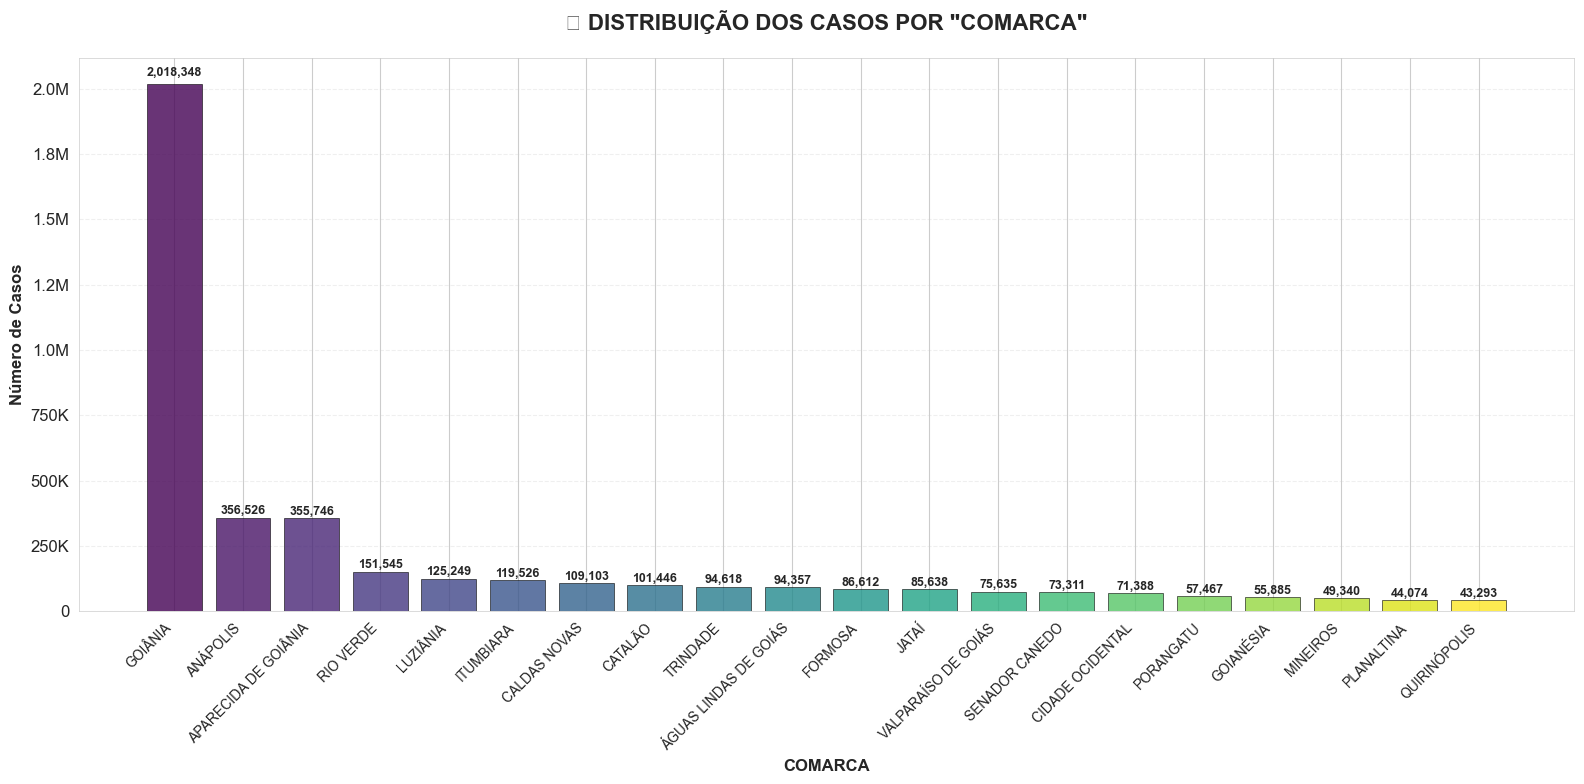

,Categoria,Contagem,Percentual (%)
0,GOIÂNIA,2018348,35.54
1,ANÁPOLIS,356526,6.28
2,APARECIDA DE GOIÂNIA,355746,6.26
3,RIO VERDE,151545,2.67
4,LUZIÂNIA,125249,2.21
5,ITUMBIARA,119526,2.10
6,CALDAS NOVAS,109103,1.92
7,CATALÃO,101446,1.79
8,TRINDADE,94618,1.67
9,ÁGUAS LINDAS DE GOIÁS,94357,1.66



💡 RESUMO ESTATÍSTICO:
   • Categoria mais frequente: 'GOIÂNIA' (2,018,348 casos)
   • Representatividade da categoria principal: 35.54%

📋 LISTA DE COLUNAS CATEGÓRICAS DISPONÍVEIS PARA ANÁLISE:
1. PRIORIDADE
2. SEGREDO_JUSTICA
3. SERVENTIA
4. CLASSE
5. ASSUNTOS
6. PROC_STATUS
7. AREA_ACAO


In [ ]:
def analisar_segmento(df, coluna, top_n=20):
    """
    📊 Função para analisar e visualizar a distribuição de uma coluna categórica.
    
    Parâmetros:
    -----------
    df : DataFrame
        DataFrame contendo os dados
    coluna : str
        Nome da coluna categórica a ser analisada
    top_n : int, opcional (padrão=15)
        Número de categorias principais a serem visualizadas
    """
    print(f"\n🎯 {'='*60}")
    print(f"📈 ANÁLISE DA COLUNA: '{coluna.upper()}")
    print(f"🎯 {'='*60}")
    
    # Verificar se a coluna existe
    if coluna not in df.columns:
        print(f"❌ ERRO: Coluna '{coluna}' não encontrada no DataFrame!")
        return None
    
    # Quantidade de valores únicos
    num_unicos = df[coluna].nunique()
    print(f"🔢 Número de categorias únicas: {num_unicos}")
    
    # Verificar valores nulos
    nulos = df[coluna].isnull().sum()
    if nulos > 0:
        print(f"⚠️  Valores nulos: {nulos} ({nulos/len(df)*100:.2f}%)")
    
    # Contagem das categorias mais frequentes
    contagem = df[coluna].value_counts()
    
    # Porcentagem do total representada pelas Top N categorias
    porc_top_n = (contagem.head(top_n).sum() / len(df)) * 100
    print(f"📊 As {top_n} categorias principais representam {porc_top_n:.2f}% de todos os casos.")
    
    # Visualização com estilo aprimorado
    plt.figure(figsize=(16, 8))
    
    # Criar paleta de cores vibrantes
    cores = plt.cm.viridis(np.linspace(0, 1, top_n))
    
    # Criar gráfico de barras
    bars = plt.bar(range(top_n), contagem.head(top_n).values, color=cores, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    # Personalizar título e rótulos
    plt.title(f'📋 DISTRIBUIÇÃO DOS CASOS POR "{coluna.upper()}"', fontsize=16, fontweight='bold', pad=20)
    plt.ylabel('Número de Casos', fontsize=12, fontweight='bold')
    plt.xlabel(coluna, fontsize=12, fontweight='bold')
    
    # Rotacionar labels para melhor visualização
    plt.xticks(range(top_n), contagem.head(top_n).index, rotation=45, ha='right', fontsize=10)
    
    # Adicionar valores nas barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{height:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Adicionar grid para melhor legibilidade
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Formatar eixo Y para valores grandes
    def formatar_valores(x, pos):
        if x >= 1_000_000:
            return f'{x/1_000_000:.1f}M'
        elif x >= 1_000:
            return f'{x/1_000:.0f}K'
        else:
            return f'{int(x)}'
    
    plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
    
    # Ajustar layout
    plt.tight_layout()
    
    # Adicionar borda ao gráfico
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.5)
    
    plt.show()
    
    # Exibir tabela com as top categorias
    display(HTML(f"<h4 style='color: #2E86AB;'>📋 TOP {top_n} CATEGORIAS - {coluna.upper()}</h4>"))
    
    tabela_resultados = pd.DataFrame({
        'Categoria': contagem.head(top_n).index,
        'Contagem': contagem.head(top_n).values,
        'Percentual (%)': (contagem.head(top_n).values / len(df) * 100).round(2)
    })
    
    display(tabela_resultados)
    
    print(f"\n💡 RESUMO ESTATÍSTICO:")
    print(f"   • Categoria mais frequente: '{contagem.index[0]}' ({contagem.values[0]:,} casos)")
    print(f"   • Representatividade da categoria principal: {contagem.values[0]/len(df)*100:.2f}%")
    
    return contagem

# Exemplo de uso com estilo
print("🚀 INICIANDO ANÁLISE DE SEGMENTOS")
print("=" * 60)

contagem_comarca = analisar_segmento(df, 'COMARCA')

# Análise adicional para outras colunas categóricas
colunas_interesse = ['PRIORIDADE', 'SEGREDO_JUSTICA', 'SERVENTIA', 'CLASSE', 'ASSUNTOS', 'PROC_STATUS', 'AREA_ACAO']

print(f"\n{'='*60}")
print("📋 LISTA DE COLUNAS CATEGÓRICAS DISPONÍVEIS PARA ANÁLISE:")
print("=" * 60)

for i, coluna in enumerate(colunas_interesse, 1):
    if coluna in df.columns:
        print(f"{i}. {coluna}")
    else:
        print(f"{i}. {coluna} ❌ (não encontrada)")
        

🚀 INICIANDO ANÁLISE COMPLETA DAS COMARCAS

🎯 ============================================================
📈 ANÁLISE COMPLETA DA COLUNA: 'COMARCA
🎯 ============================================================
🔢 Número total de comarcas únicas: 119


C:\Users\mlzengo\AppData\Local\Temp\ipykernel_15216\203002062.py:71: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


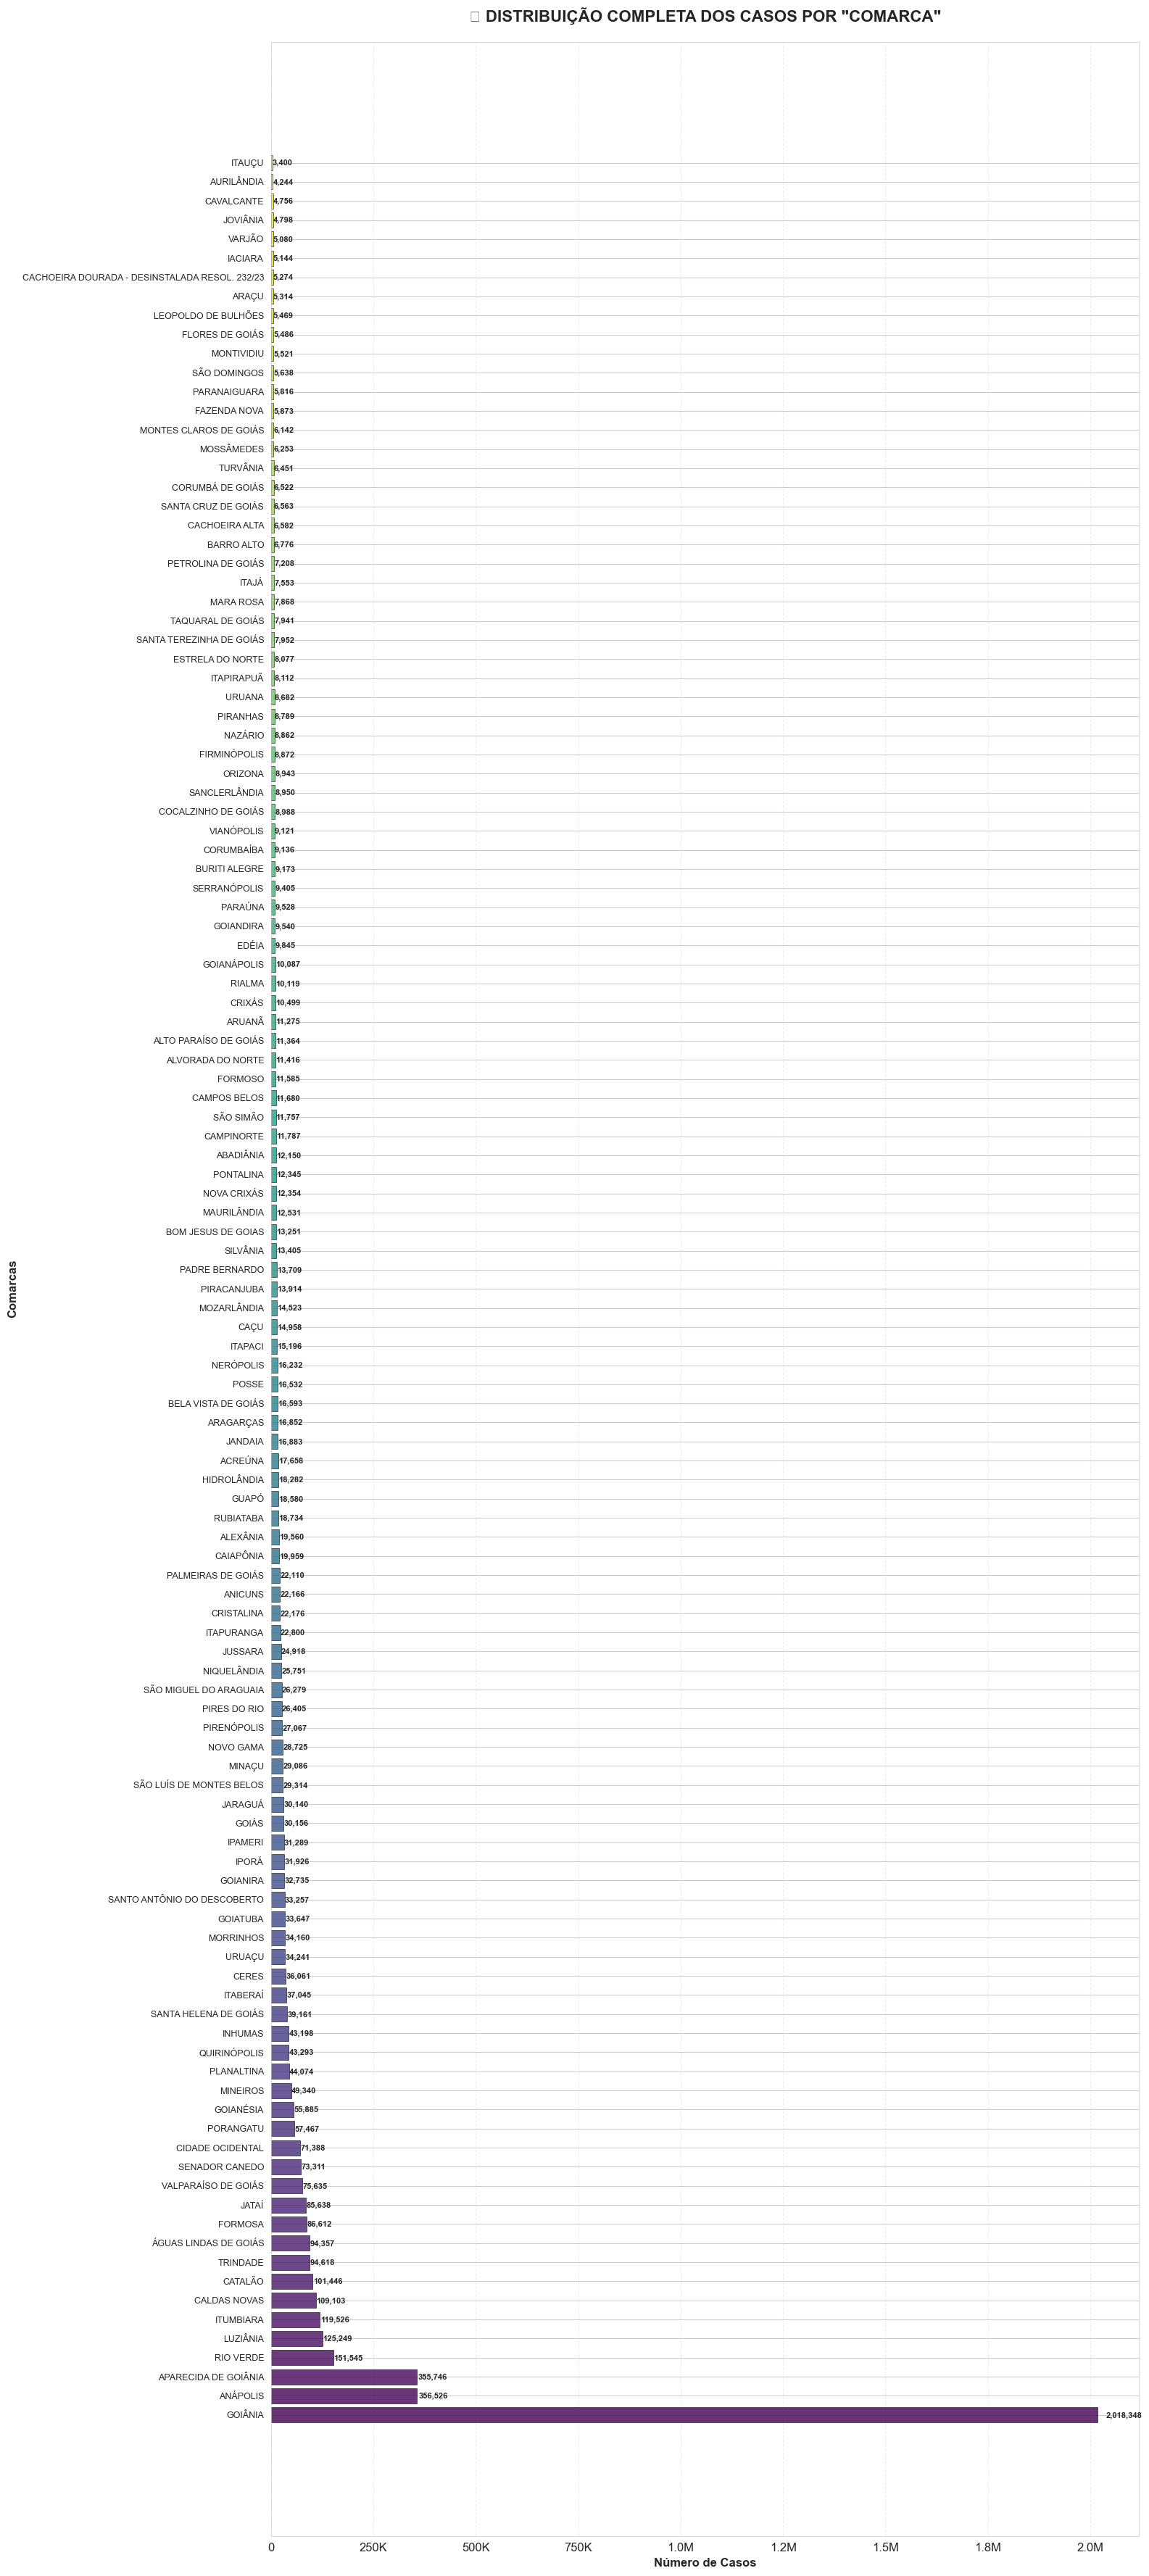

,Comarca,Contagem,Percentual (%),Percentual Acumulado (%)
0,GOIÂNIA,2018348,35.5447,35.54
1,ANÁPOLIS,356526,6.2787,41.82
2,APARECIDA DE GOIÂNIA,355746,6.2650,48.09
3,RIO VERDE,151545,2.6688,50.76
4,LUZIÂNIA,125249,2.2057,52.96
...,...,...,...,...
114,VARJÃO,5080,0.0895,99.70
115,JOVIÂNIA,4798,0.0845,99.78
116,CAVALCANTE,4756,0.0838,99.87
117,AURILÂNDIA,4244,0.0747,99.94



💡 RESUMO ESTATÍSTICO:
   • Comarca mais frequente: 'GOIÂNIA' (2,018,348 casos)
   • Representatividade da comarca principal: 35.54%
   • Média de casos por comarca: 47717.1
   • Desvio padrão: 189236.4


In [ ]:
def analisar_comarca_completa(df, coluna='COMARCA'):
    """
    📊 Função para analisar e visualizar TODAS as variações da coluna COMARCA.
    
    Parâmetros:
    -----------
    df : DataFrame
        DataFrame contendo os dados
    coluna : str, opcional (padrão='COMARCA')
        Nome da coluna a ser analisada
    """
    print(f"\n🎯 {'='*60}")
    print(f"📈 ANÁLISE COMPLETA DA COLUNA: '{coluna.upper()}")
    print(f"🎯 {'='*60}")
    
    # Verificar se a coluna existe
    if coluna not in df.columns:
        print(f"❌ ERRO: Coluna '{coluna}' não encontrada no DataFrame!")
        return None
    
    # Quantidade de valores únicos
    num_unicos = df[coluna].nunique()
    print(f"🔢 Número total de comarcas únicas: {num_unicos}")
    
    # Verificar valores nulos
    nulos = df[coluna].isnull().sum()
    if nulos > 0:
        print(f"⚠️  Valores nulos: {nulos} ({nulos/len(df)*100:.2f}%)")
    
    # Contagem de todas as categorias
    contagem = df[coluna].value_counts()
    
    # Visualização com todas as comarcas (usando gráfico horizontal para melhor visualização)
    plt.figure(figsize=(16, max(8, num_unicos * 0.3)))  # Ajusta altura automaticamente
    
    # Criar paleta de cores
    cores = plt.cm.viridis(np.linspace(0, 1, num_unicos))
    
    # Criar gráfico de barras horizontal
    bars = plt.barh(range(num_unicos), contagem.values, color=cores, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    # Personalizar título e rótulos
    plt.title(f'📋 DISTRIBUIÇÃO COMPLETA DOS CASOS POR "{coluna.upper()}"', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Número de Casos', fontsize=12, fontweight='bold')
    plt.ylabel('Comarcas', fontsize=12, fontweight='bold')
    
    # Adicionar labels das comarcas
    plt.yticks(range(num_unicos), contagem.index, fontsize=9)
    
    # Adicionar valores nas barras
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2,
                f'{width:,}', ha='left', va='center', fontsize=8, fontweight='bold')
    
    # Adicionar grid para melhor legibilidade
    plt.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Formatar eixo X para valores grandes
    def formatar_valores(x, pos):
        if x >= 1_000_000:
            return f'{x/1_000_000:.1f}M'
        elif x >= 1_000:
            return f'{x/1_000:.0f}K'
        else:
            return f'{int(x)}'
    
    plt.gca().xaxis.set_major_formatter(FuncFormatter(formatar_valores))
    
    # Ajustar layout
    plt.tight_layout()
    
    # Adicionar borda ao gráfico
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.5)
    
    plt.show()
    
    # Exibir tabela completa com todas as comarcas
    display(HTML(f"<h4 style='color: #2E86AB;'>📋 TODAS AS {num_unicos} COMARCAS</h4>"))
    
    tabela_resultados = pd.DataFrame({
        'Comarca': contagem.index,
        'Contagem': contagem.values,
        'Percentual (%)': (contagem.values / len(df) * 100).round(4),
        'Percentual Acumulado (%)': (contagem.cumsum().values / len(df) * 100).round(2)
    })
    
    display(tabela_resultados)
    
    print(f"\n💡 RESUMO ESTATÍSTICO:")
    print(f"   • Comarca mais frequente: '{contagem.index[0]}' ({contagem.values[0]:,} casos)")
    print(f"   • Representatividade da comarca principal: {contagem.values[0]/len(df)*100:.2f}%")
    print(f"   • Média de casos por comarca: {contagem.mean():.1f}")
    print(f"   • Desvio padrão: {contagem.std():.1f}")
    
    return contagem

# Exemplo de uso
print("🚀 INICIANDO ANÁLISE COMPLETA DAS COMARCAS")
print("=" * 60)

contagem_completa_comarca = analisar_comarca_completa(df, 'COMARCA')

🚀 INICIANDO ANÁLISE DE SEGMENTOS

🎯 ============================================================
📈 ANÁLISE DA COLUNA SIMPLES: 'CLASSE'
🎯 ============================================================
🔢 Número de categorias únicas: 388
📊 As 20 categorias principais representam 83.54% de todos os casos.


C:\Users\mlzengo\AppData\Local\Temp\ipykernel_15216\3712673440.py:46: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


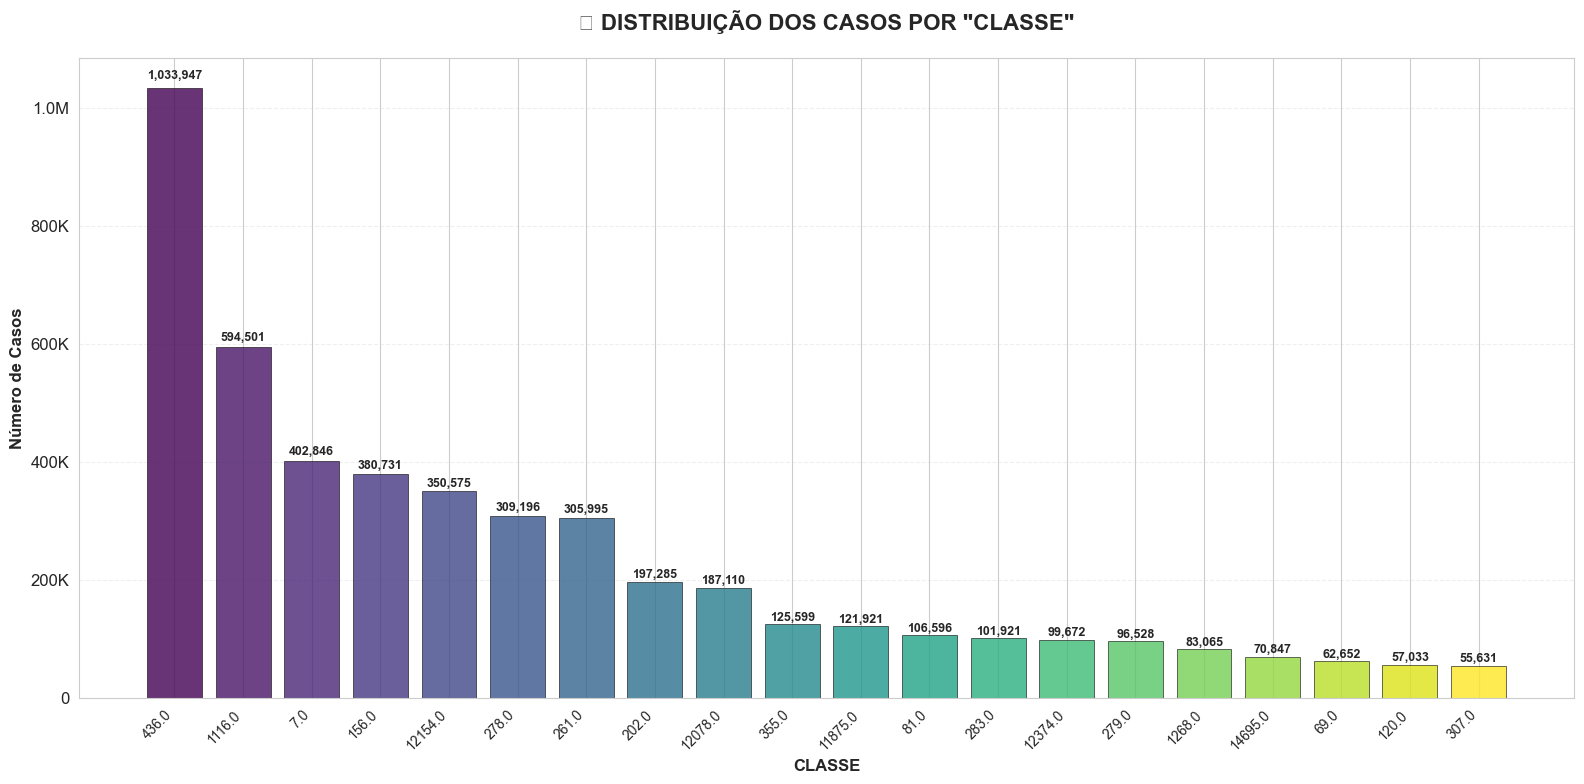

,Categoria,Contagem,Percentual (%)
0,436.0,1033947,18.21
1,1116.0,594501,10.47
2,7.0,402846,7.09
3,156.0,380731,6.70
4,12154.0,350575,6.17
5,278.0,309196,5.45
6,261.0,305995,5.39
7,202.0,197285,3.47
8,12078.0,187110,3.30
9,355.0,125599,2.21



💡 RESUMO ESTATÍSTICO:
   • Categoria mais frequente: '436.0' (1,033,947 casos)
   • Representatividade da categoria principal: 18.21%

🎯 ============================================================
📈 ANÁLISE DA COLUNA DE LISTAS: 'ASSUNTOS'
🎯 ============================================================
🔢 Número de itens únicos: 3019
📊 Os 20 itens principais representam 43.60% de todas as ocorrências de itens.


C:\Users\mlzengo\AppData\Local\Temp\ipykernel_15216\3712673440.py:105: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


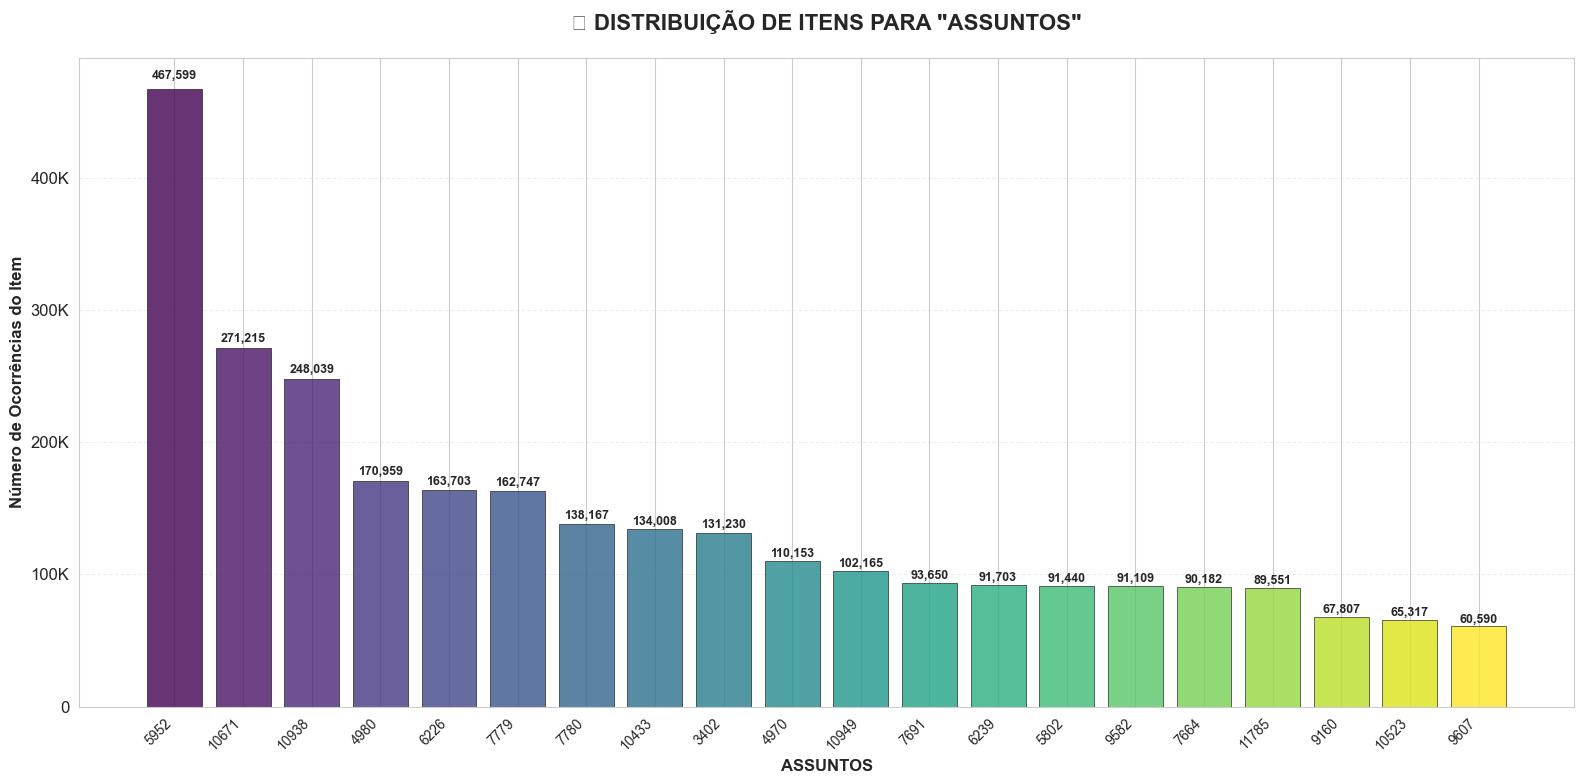

,Item,Contagem,Percentual (%)
0,5952,467599,7.18
1,10671,271215,4.16
2,10938,248039,3.81
3,4980,170959,2.62
4,6226,163703,2.51
5,7779,162747,2.50
6,7780,138167,2.12
7,10433,134008,2.06
8,3402,131230,2.01
9,4970,110153,1.69



💡 RESUMO ESTATÍSTICO:
   • Item mais frequente: '5952' (467,599 ocorrências)
   • Representatividade do item principal: 7.18%

🎯 ============================================================
📈 ANÁLISE DA COLUNA DE LISTAS: 'CNJ_ASSUNTO'
🎯 ============================================================
🔢 Número de itens únicos: 2643
📊 Os 20 itens principais representam 47.22% de todas as ocorrências de itens.


C:\Users\mlzengo\AppData\Local\Temp\ipykernel_15216\3712673440.py:105: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


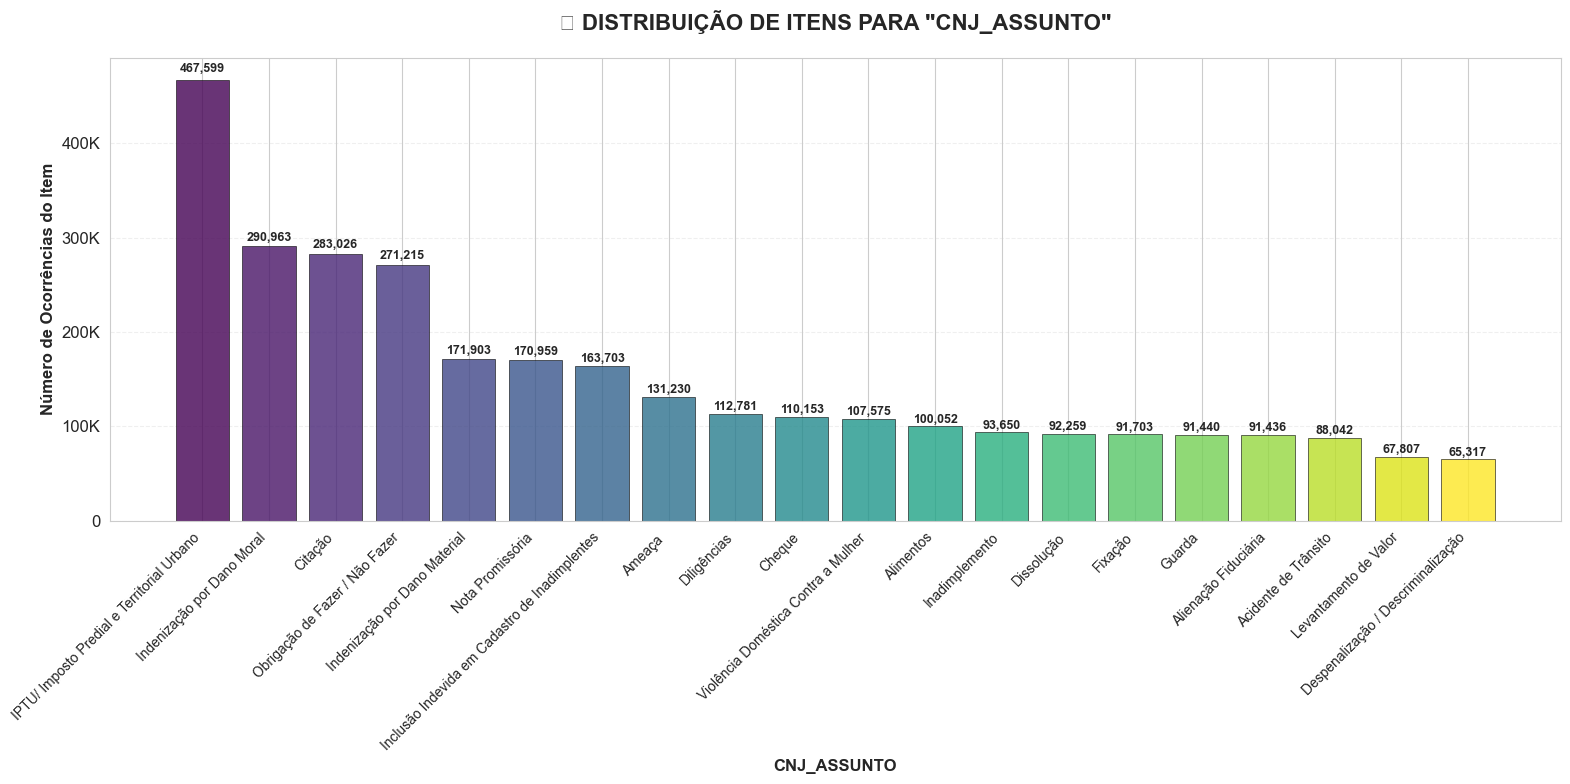

,Item,Contagem,Percentual (%)
0,IPTU/ Imposto Predial e Territorial Urbano,467599,7.21
1,Indenização por Dano Moral,290963,4.49
2,Citação,283026,4.36
3,Obrigação de Fazer / Não Fazer,271215,4.18
4,Indenização por Dano Material,171903,2.65
5,Nota Promissória,170959,2.64
6,Inclusão Indevida em Cadastro de Inadimplentes,163703,2.52
7,Ameaça,131230,2.02
8,Diligências,112781,1.74
9,Cheque,110153,1.70



💡 RESUMO ESTATÍSTICO:
   • Item mais frequente: 'IPTU/ Imposto Predial e Territorial Urbano' (467,599 ocorrências)
   • Representatividade do item principal: 7.21%


In [ ]:


# --- FUNÇÃO PARA COLUNAS CATEGÓRICAS SIMPLES (Inalterada) ---
def analisar_segmento_simples(df, coluna, top_n=30):
    # (Seu código original para colunas simples vai aqui, sem nenhuma alteração)
    print(f"\n🎯 {'='*60}")
    print(f"📈 ANÁLISE DA COLUNA SIMPLES: '{coluna.upper()}'")
    print(f"🎯 {'='*60}")
    
    if coluna not in df.columns:
        print(f"❌ ERRO: Coluna '{coluna}' não encontrada no DataFrame!")
        return None
    
    num_unicos = df[coluna].nunique()
    print(f"🔢 Número de categorias únicas: {num_unicos}")
    
    # ... (o resto da sua função continua igual)
    nulos = df[coluna].isnull().sum()
    if nulos > 0:
        print(f"⚠️  Valores nulos: {nulos} ({nulos/len(df)*100:.2f}%)")
    
    contagem = df[coluna].value_counts()
    porc_top_n = (contagem.head(top_n).sum() / len(df)) * 100
    print(f"📊 As {top_n} categorias principais representam {porc_top_n:.2f}% de todos os casos.")
    
    plt.figure(figsize=(16, 8))
    cores = plt.cm.viridis(np.linspace(0, 1, top_n))
    bars = plt.bar(range(top_n), contagem.head(top_n).values, color=cores, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    plt.title(f'📋 DISTRIBUIÇÃO DOS CASOS POR "{coluna.upper()}"', fontsize=16, fontweight='bold', pad=20)
    plt.ylabel('Número de Casos', fontsize=12, fontweight='bold')
    plt.xlabel(coluna, fontsize=12, fontweight='bold')
    plt.xticks(range(top_n), contagem.head(top_n).index, rotation=45, ha='right', fontsize=10)
    
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                 f'{height:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    def formatar_valores(x, pos):
        if x >= 1_000_000: return f'{x/1_000_000:.1f}M'
        elif x >= 1_000: return f'{x/1_000:.0f}K'
        else: return f'{int(x)}'
    
    plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
    plt.tight_layout()
    plt.show()
    
    display(HTML(f"<h4 style='color: #2E86AB;'>📋 TOP {top_n} CATEGORIAS - {coluna.upper()}</h4>"))
    tabela_resultados = pd.DataFrame({
        'Categoria': contagem.head(top_n).index,
        'Contagem': contagem.head(top_n).values,
        'Percentual (%)': (contagem.head(top_n).values / len(df) * 100).round(2)
    })
    display(tabela_resultados)
    
    print(f"\n💡 RESUMO ESTATÍSTICO:")
    print(f"   • Categoria mais frequente: '{contagem.index[0]}' ({contagem.values[0]:,} casos)")
    print(f"   • Representatividade da categoria principal: {contagem.values[0]/len(df)*100:.2f}%")
    return contagem

# --- NOVA FUNÇÃO PARA COLUNAS COM LISTAS (Inalterada) ---
def analisar_segmento_lista(df, coluna, top_n=30):
    # (A função que usa .explode() continua igual à anterior)
    print(f"\n🎯 {'='*60}")
    print(f"📈 ANÁLISE DA COLUNA DE LISTAS: '{coluna.upper()}'")
    print(f"🎯 {'='*60}")
    
    if coluna not in df.columns:
        print(f"❌ ERRO: Coluna '{coluna}' não encontrada no DataFrame!")
        return None
    
    exploded_series = df[coluna].explode().dropna()
    
    num_unicos = exploded_series.nunique()
    print(f"🔢 Número de itens únicos: {num_unicos}")
    
    # ... (o resto da função continua igual)
    contagem = exploded_series.value_counts()
    porc_top_n = (contagem.head(top_n).sum() / len(exploded_series)) * 100
    print(f"📊 Os {top_n} itens principais representam {porc_top_n:.2f}% de todas as ocorrências de itens.")
    
    plt.figure(figsize=(16, 8))
    cores = plt.cm.viridis(np.linspace(0, 1, top_n))
    bars = plt.bar(range(top_n), contagem.head(top_n).values, color=cores, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    plt.title(f'📋 DISTRIBUIÇÃO DE ITENS PARA "{coluna.upper()}"', fontsize=16, fontweight='bold', pad=20)
    plt.ylabel('Número de Ocorrências do Item', fontsize=12, fontweight='bold')
    plt.xlabel(coluna, fontsize=12, fontweight='bold')
    plt.xticks(range(top_n), contagem.head(top_n).index, rotation=45, ha='right', fontsize=10)
    
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                 f'{height:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    def formatar_valores(x, pos):
        if x >= 1_000_000: return f'{x/1_000_000:.1f}M'
        elif x >= 1_000: return f'{x/1_000:.0f}K'
        else: return f'{int(x)}'
        
    plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
    plt.tight_layout()
    plt.show()
    
    display(HTML(f"<h4 style='color: #2E86AB;'>📋 TOP {top_n} ITENS - {coluna.upper()}</h4>"))
    tabela_resultados = pd.DataFrame({
        'Item': contagem.head(top_n).index,
        'Contagem': contagem.head(top_n).values,
        'Percentual (%)': (contagem.head(top_n).values / len(exploded_series) * 100).round(2)
    })
    display(tabela_resultados)

    print(f"\n💡 RESUMO ESTATÍSTICO:")
    print(f"   • Item mais frequente: '{contagem.index[0]}' ({contagem.values[0]:,} ocorrências)")
    print(f"   • Representatividade do item principal: {contagem.values[0]/len(exploded_series)*100:.2f}%")
    return contagem

# --- FUNÇÃO PRINCIPAL CORRIGIDA E MAIS ROBUSTA ---
def analisar_coluna(df, coluna, top_n=30):
    """
    Analisa uma coluna do DataFrame, decidindo qual função usar
    com base em uma lista explícita de colunas que contêm listas.
    """
    # Lista explícita das colunas que sabemos que contêm listas
    COLUNAS_DE_LISTAS = ['ASSUNTOS', 'CNJ_ASSUNTO', 'PROJUDI_ASSUNTO']
    
    if coluna in COLUNAS_DE_LISTAS:
        # Se a coluna estiver na nossa lista, usa a função para listas
        analisar_segmento_lista(df, coluna, top_n)
    else:
        # Caso contrário, usa a função para categorias simples
        analisar_segmento_simples(df, coluna, top_n)


# ==============================================================================
# --- EXEMPLO DE USO ---
# Agora as chamadas funcionarão corretamente para ambos os casos
# ==============================================================================

print("🚀 INICIANDO ANÁLISE DE SEGMENTOS")
print("=" * 60)

# 1. Análise de uma coluna categórica SIMPLES
analisar_coluna(df, 'CLASSE', top_n=20)

# 2. Análise de uma coluna com LISTAS
analisar_coluna(df, 'ASSUNTOS', top_n=20)

# 3. Análise de outra coluna com LISTAS
analisar_coluna(df, 'CNJ_ASSUNTO', top_n=20)

In [ ]:


# 1.1. Identificar as áreas de ação únicas no dataset
areas_acao = df['AREA_ACAO'].unique()
print(f"Áreas de Ação encontradas: {list(areas_acao)}")

# 1.2. Definir o diretório de saída para os datasets segmentados (caminho absoluto)
output_dir = r"C:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\data\processed"

# Criar o diretório, se ele não existir
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Diretório '{output_dir}' criado com sucesso.")
else:
    print(f"Diretório '{output_dir}' já existe. Os arquivos serão salvos nele.")

# 1.3. Filtrar e salvar um CSV para cada área de ação
saved_files = {}
for area in areas_acao:
    # Lida com casos em que a área pode ser NaN (nula)
    if pd.isna(area):
        print("Ignorando área com nome NaN.")
        continue
    
    # Filtra o dataframe para a área atual
    df_area = df[df['AREA_ACAO'] == area].copy()

    # Cria um nome de arquivo seguro
    # Ex: "Área Cível / Família" -> "dados_area_civel__familia.csv"
    nome_arquivo_seguro = f"casos_area_{area.replace(' ', '_').replace('/', '_').lower()}.csv"
    caminho_arquivo = os.path.join(output_dir, nome_arquivo_seguro)
    
    # Salva o dataframe filtrado em um arquivo CSV
    df_area.to_csv(caminho_arquivo, index=False, encoding="utf-8-sig")
    
    # Guarda o caminho do arquivo para usar na etapa de análise
    saved_files[area] = caminho_arquivo
    print(f"- Dataset para '{area}' salvo em '{caminho_arquivo}' com {len(df_area):,} linhas.")


Áreas de Ação encontradas: ['Cível', 'Criminal']
Diretório 'C:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\data\processed' já existe. Os arquivos serão salvos nele.
- Dataset para 'Cível' salvo em 'C:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\data\processed\casos_area_cível.csv' com 4,604,487 linhas.
- Dataset para 'Criminal' salvo em 'C:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\data\processed\casos_area_criminal.csv' com 1,073,850 linhas.
